In [177]:
import numpy as np
import matplotlib.pyplot as plt

test = False

In [178]:
filename = "test.txt" if test else "input.txt"
with open(filename) as f:
    lines = f.readlines()
elv_map_raw = np.array([list(line.strip()) for line in lines])
loc_to_ple = lambda loc: tuple([x[0] for x in loc])

start_pos = loc_to_ple(np.where(elv_map_raw == "S"))
target_pos = loc_to_ple(np.where(elv_map_raw == "E"))
if test:
    print(elv_map_raw, start_pos, target_pos)

In [179]:
value_replacer = lambda x: 0 if x == "S" else (25 if x == "E" else ord(x) - 97)
value_replacer = np.vectorize(value_replacer)
elv_map = value_replacer(elv_map_raw)
if test:
    plt.imshow(elv_map, interpolation=None)

In [180]:
def find_reachable(elv_map, pos):
    current = elv_map[pos]
    reachable = []
    for offset in [(0, 1), (0, -1), (1, 0), (-1, 0)]:
        loc = pos[0] + offset[0], pos[1] + offset[1]
        try:
            if elv_map[loc] <= current + 1 and loc[0] >= 0 and loc[1] >= 0:
                reachable.append((loc))
        except IndexError:
            pass
    return reachable

In [193]:
def find_path(start_pos,test):
    paths = [[start_pos]]
    visited = []
    for i in range(1000):
        if test:
            print(f"{paths = }")
        paths_new = []
        for path in paths:
            locs_temp = find_reachable(elv_map, path[-1])
            for loc in locs_temp:
                if loc in visited:
                    continue
                visited.append(loc)
                path_new = path + [loc]
                if loc == target_pos:
                    if test: print(f"found path with  {len(path_new)-1} steps \n", path_new)
                    return path_new
                paths_new.append(path_new)
        paths = paths_new
        


path = find_path(start_pos,test)  # 340 too high 335 too low

In [194]:
if not path[-1] == target_pos: print("Path does't end at target")
prev = 0
for step in path:
    curr = elv_map[step]
    if not curr <= prev + 1:
        print('illegal move')
        break
    prev = curr

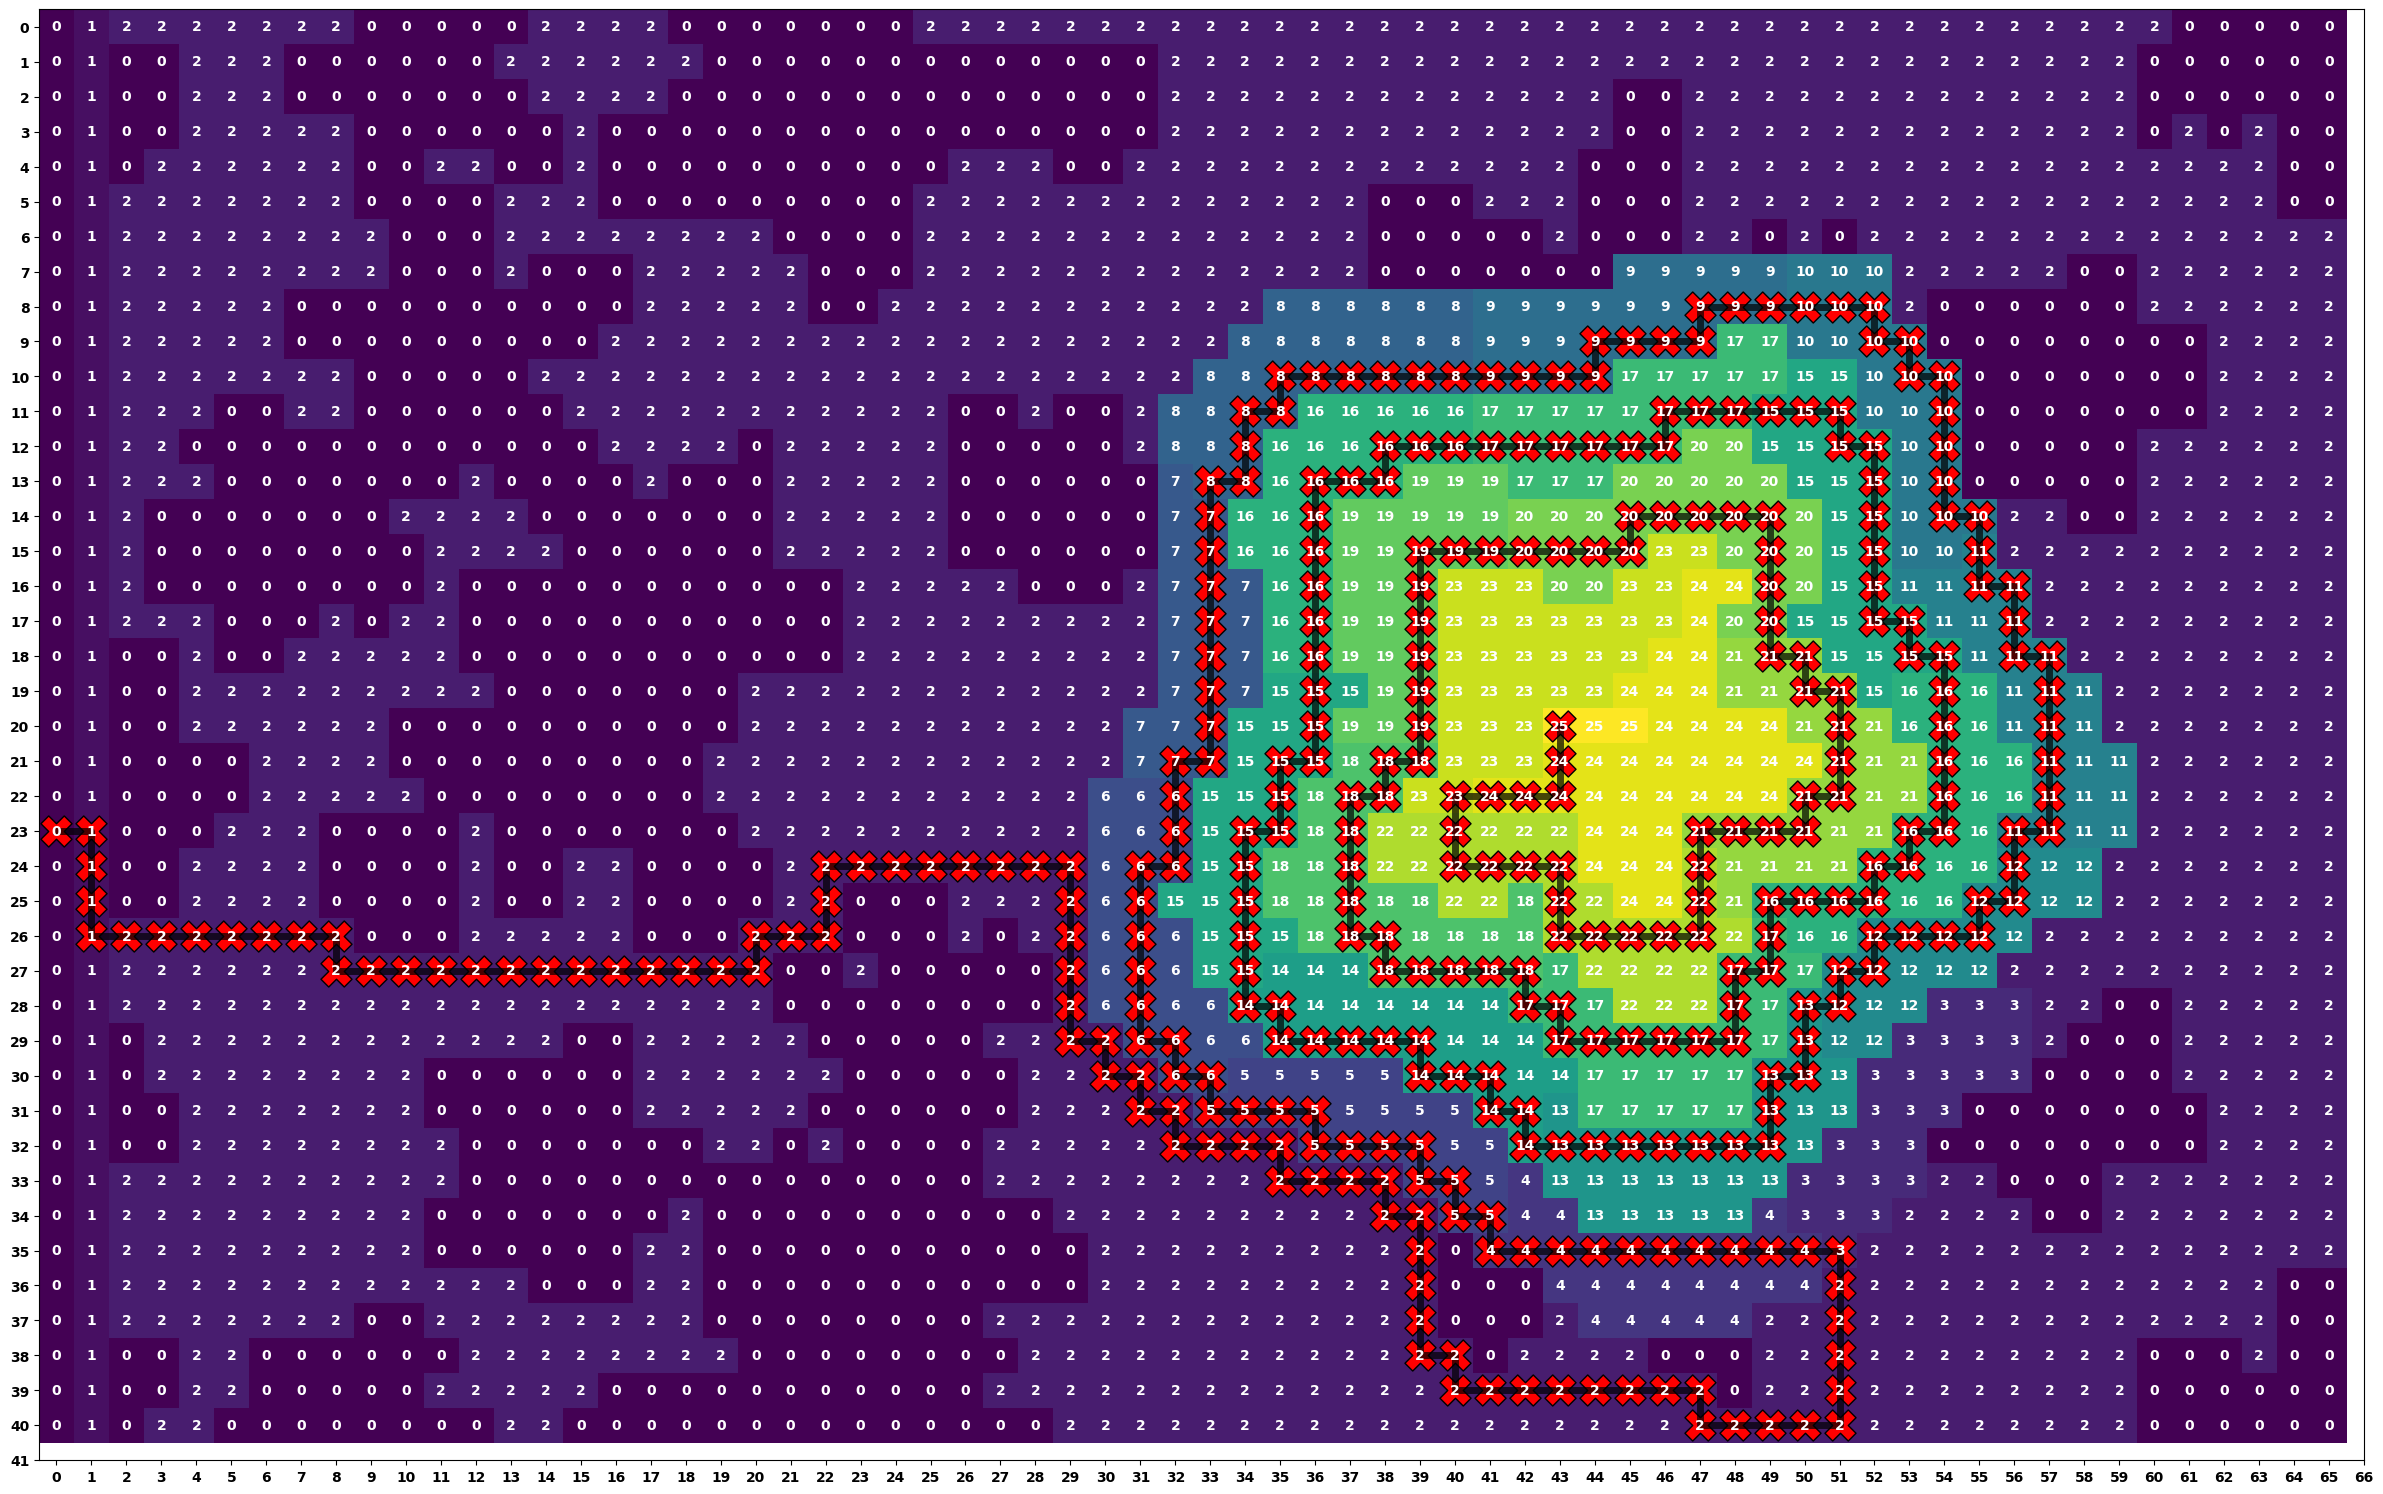

In [195]:
_ = plt.figure(figsize=(30, 30))
_ = plt.imshow(elv_map, interpolation='antialiased', norm='linear')
path_x = [x for (y, x) in path]
path_y = [y for (y, x) in path]
_ = plt.plot(path_x, path_y, lw=5, c="black", alpha=0.7)
_ = plt.scatter(path_x, path_y, marker="X", facecolor="red", edgecolor="black", s=500)
_=plt.xticks([*range(elv_map.shape[1]+1)])
_=plt.yticks([*range(elv_map.shape[0]+1)])
# plt.grid()
for i in range((elv_map.shape[0])):
    for j in range((elv_map.shape[1])):
        text = plt.text(j, i, elv_map[i, j],
                       ha="center", va="center", color="w")

# Part 2

In [197]:
possible_start_pos_y, possible_start_pos_x= np.where(elv_map==0)
path_length=float('inf')
for i in range(len(possible_start_pos_x)):
    start_pos=(possible_start_pos_y[i], possible_start_pos_x[i])
    path = find_path(start_pos,False)
    if path:
        if len(path)<path_length:
            path_final=path
            path_length= len(path)
print(len(path_final)-1)


332


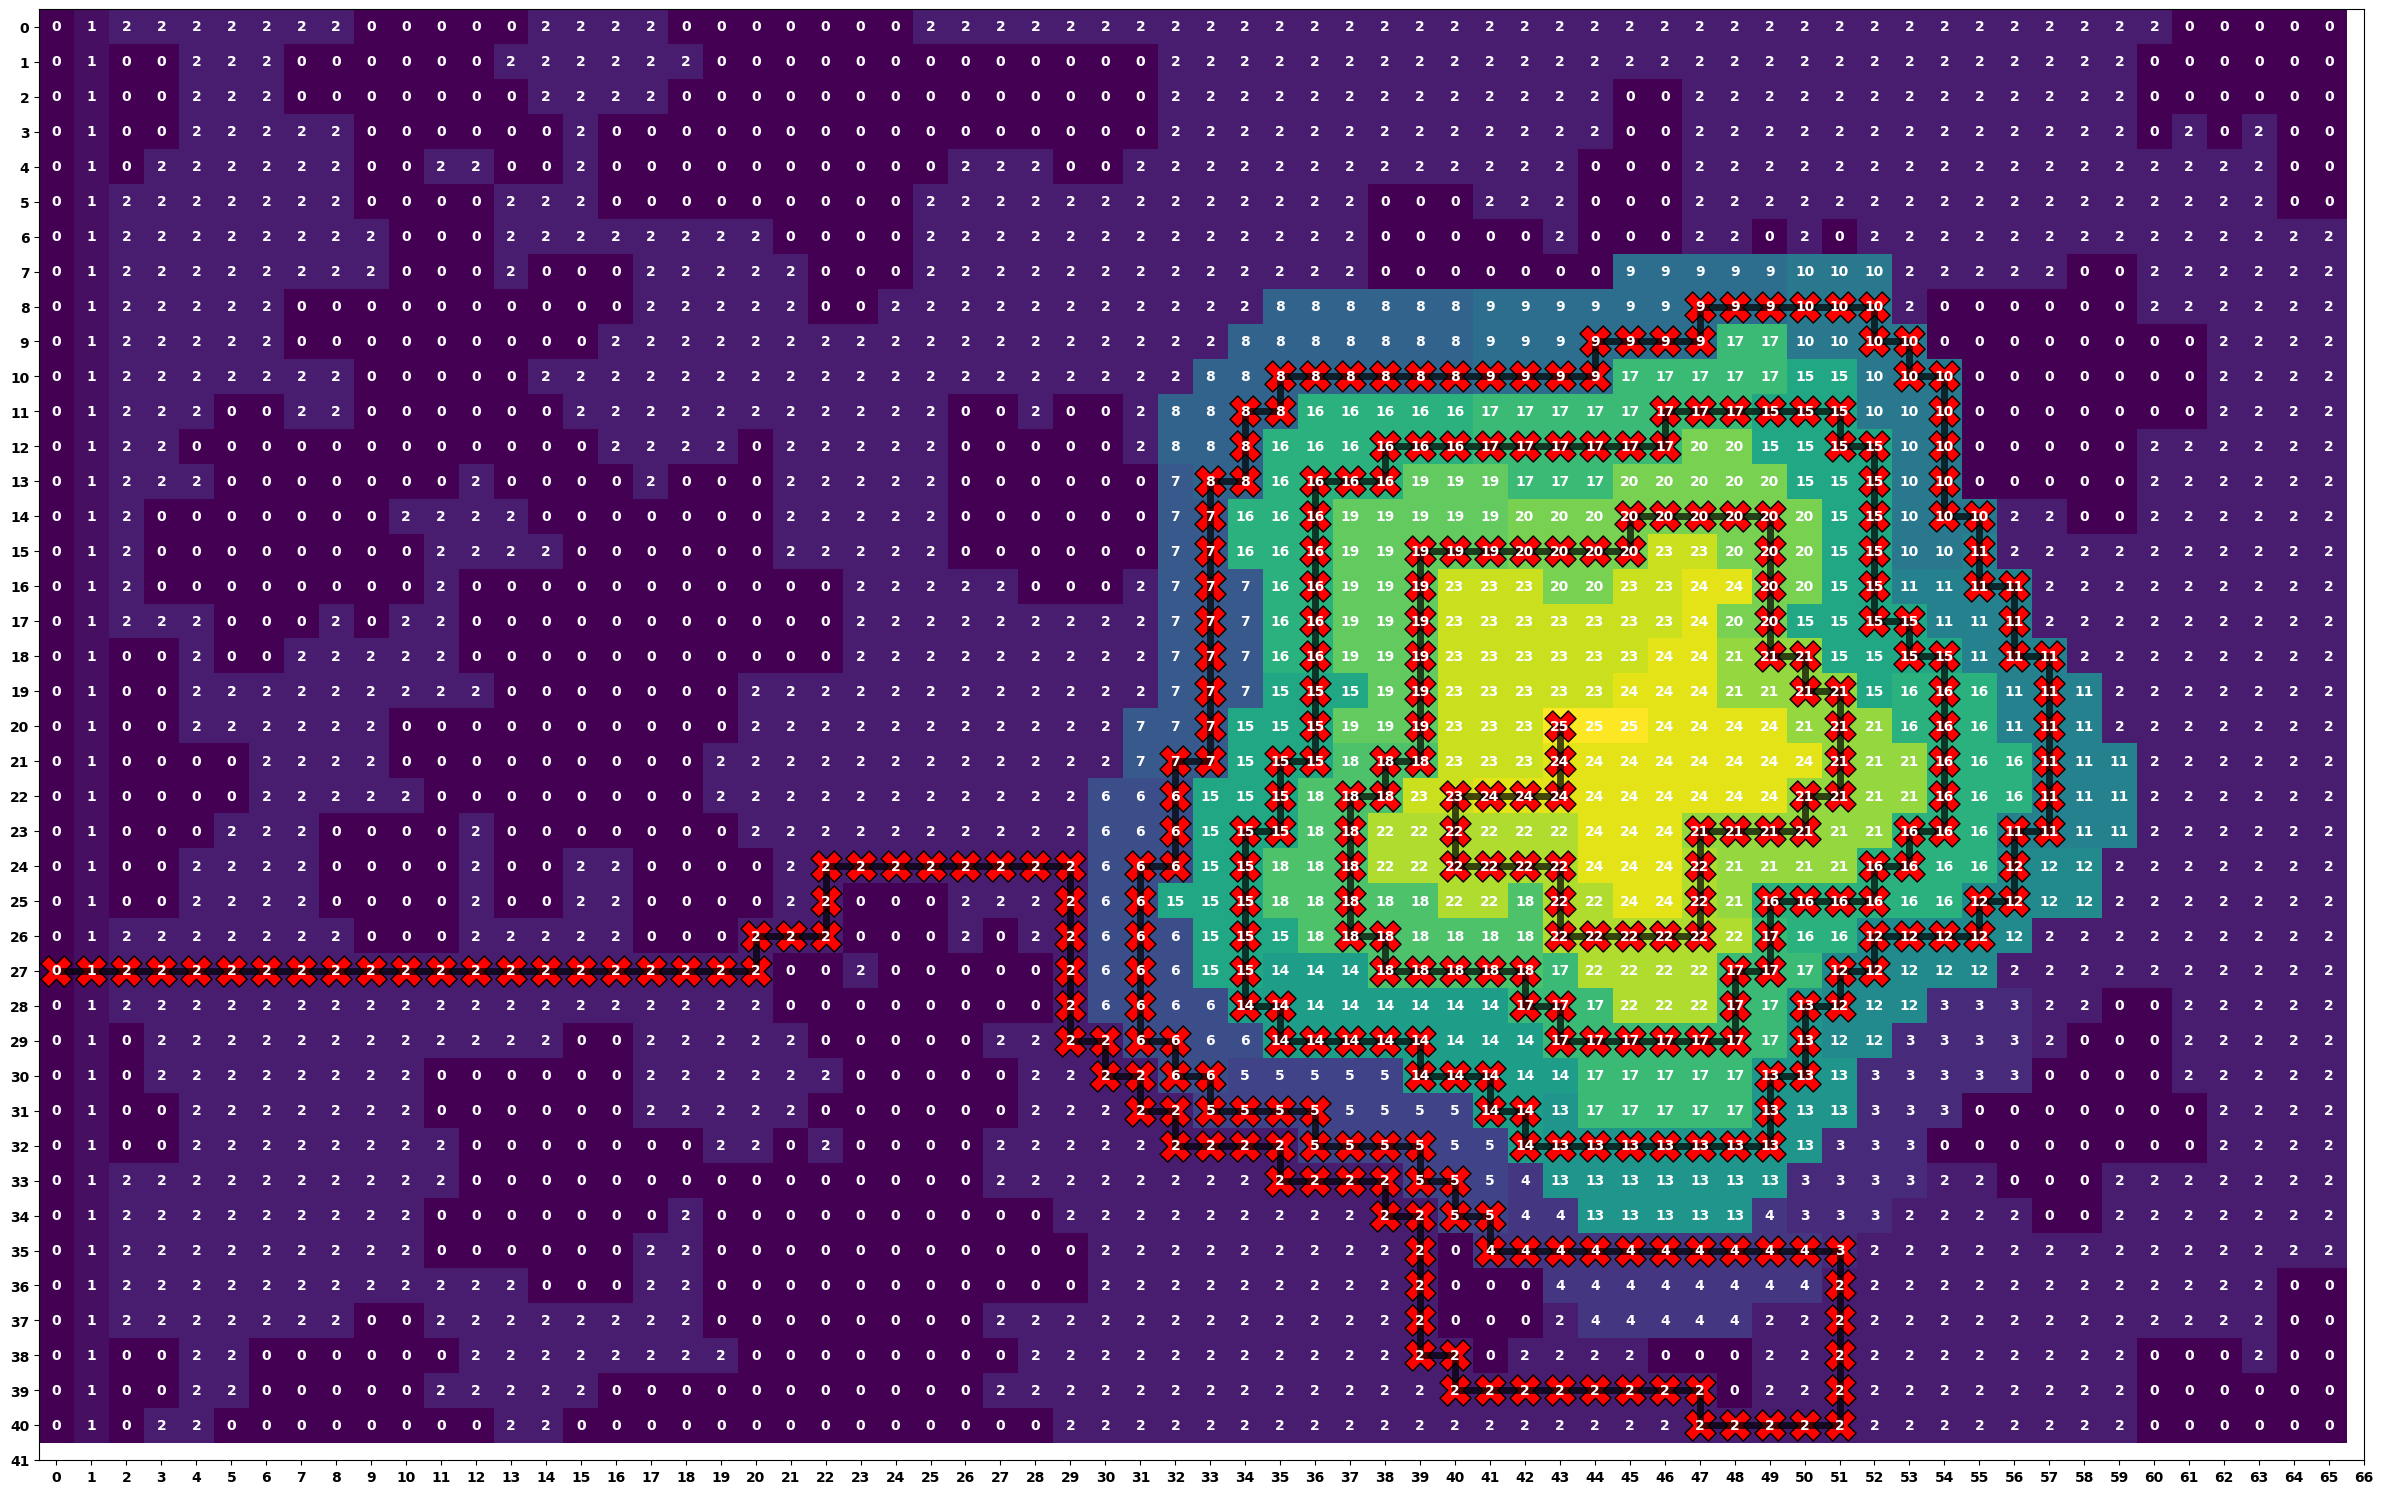

In [198]:
_ = plt.figure(figsize=(30, 30))
_ = plt.imshow(elv_map, interpolation='antialiased', norm='linear')
path_x = [x for (y, x) in path_final]
path_y = [y for (y, x) in path_final]
_ = plt.plot(path_x, path_y, lw=5, c="black", alpha=0.7)
_ = plt.scatter(path_x, path_y, marker="X", facecolor="red", edgecolor="black", s=500)
_=plt.xticks([*range(elv_map.shape[1]+1)])
_=plt.yticks([*range(elv_map.shape[0]+1)])
# plt.grid()
for i in range((elv_map.shape[0])):
    for j in range((elv_map.shape[1])):
        text = plt.text(j, i, elv_map[i, j],
                       ha="center", va="center", color="w")